In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')



# Create Triangulated Surface

Create a surface from a set of points through a Delaunay triangulation.


In [2]:
import numpy as np
import pyvista as pv

## Simple Triangulations

First, create some points for the surface.



In [3]:
# Define a simple Gaussian surface
n = 20
x = np.linspace(-200, 200, num=n) + np.random.uniform(-5, 5, size=n)
y = np.linspace(-200, 200, num=n) + np.random.uniform(-5, 5, size=n)
xx, yy = np.meshgrid(x, y)
A, b = 100, 100
zz = A * np.exp(-0.5 * ((xx / b) ** 2.0 + (yy / b) ** 2.0))

# Get the points as a 2D NumPy array (N by 3)
points = np.c_[xx.reshape(-1), yy.reshape(-1), zz.reshape(-1)]
points[0:5, :]

array([[-196.77097104, -198.28920449,    2.02040705],
       [-176.19318755, -198.28920449,    2.96547668],
       [-156.8070477 , -198.28920449,    4.09520691],
       [-138.98620813, -198.28920449,    5.33016104],
       [-116.19972316, -198.28920449,    7.12864356]])

Now use those points to create a point cloud PyVista data object. This will
be encompassed in a :class:`pyvista.PolyData` object.



/Users/aidanbx/miniconda/envs/cv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


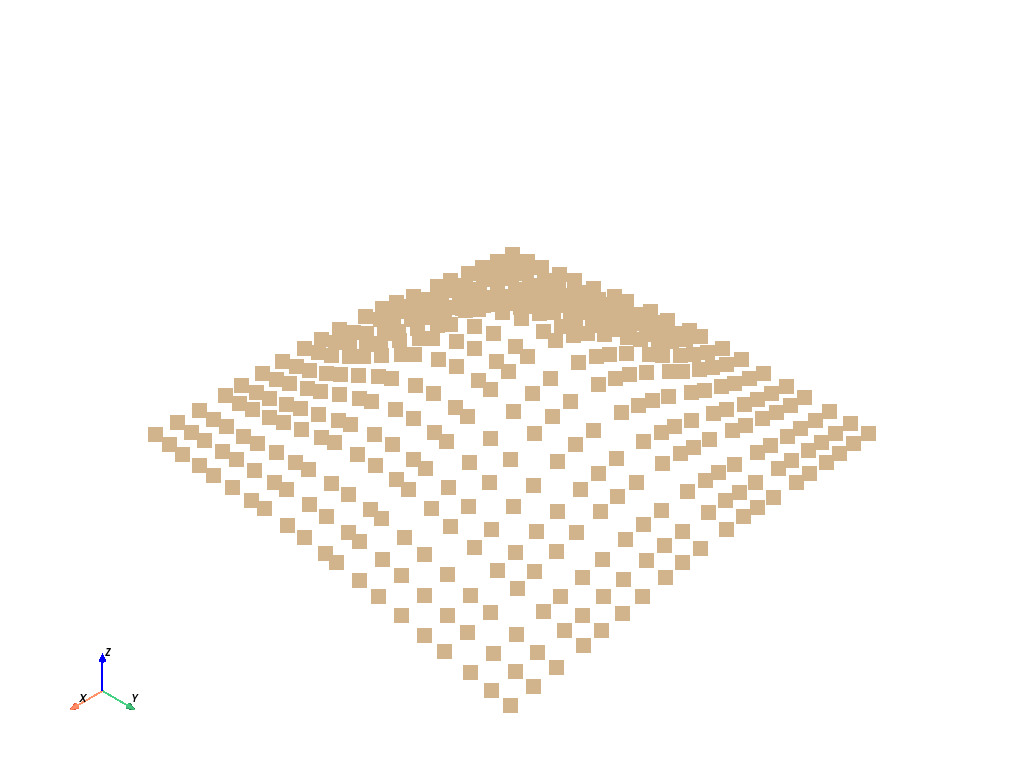

In [4]:
# simply pass the numpy points to the PolyData constructor
cloud = pv.PolyData(points)
cloud.plot(point_size=15)

Now that we have a PyVista data structure of the points, we can perform a
triangulation to turn those boring discrete points into a connected surface.



/Users/aidanbx/miniconda/envs/cv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


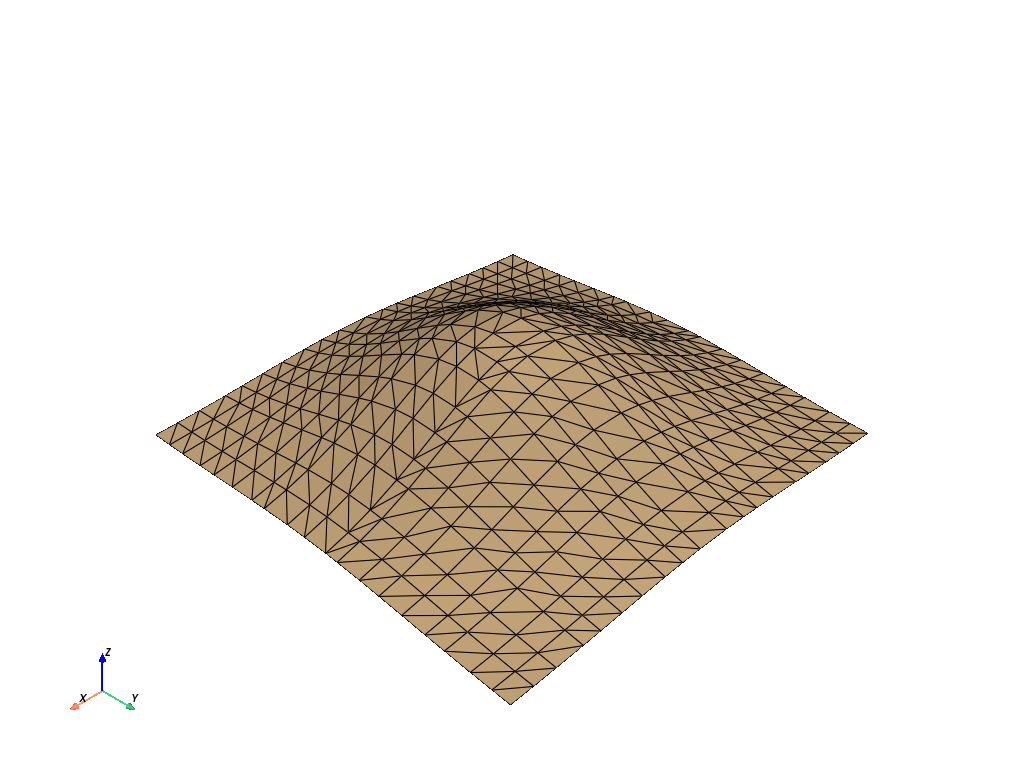

In [5]:
surf = cloud.delaunay_2d()
surf.plot(show_edges=True)

## Masked Triangulations




In [6]:
x = np.arange(10, dtype=float)
xx, yy, zz = np.meshgrid(x, x, [0])
points = np.column_stack((xx.ravel(order="F"), yy.ravel(order="F"), zz.ravel(order="F")))
# Perturb the points
points[:, 0] += np.random.rand(len(points)) * 0.3
points[:, 1] += np.random.rand(len(points)) * 0.3
# Create the point cloud mesh to triangulate from the coordinates
cloud = pv.PolyData(points)
cloud

PolyData,Information
N Cells,100
N Points,100
N Strips,0
X Bounds,"2.623e-02, 9.256e+00"
Y Bounds,"9.495e-02, 9.294e+00"
Z Bounds,"0.000e+00, 0.000e+00"
N Arrays,0


Run the triangulation on these points



/Users/aidanbx/miniconda/envs/cv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


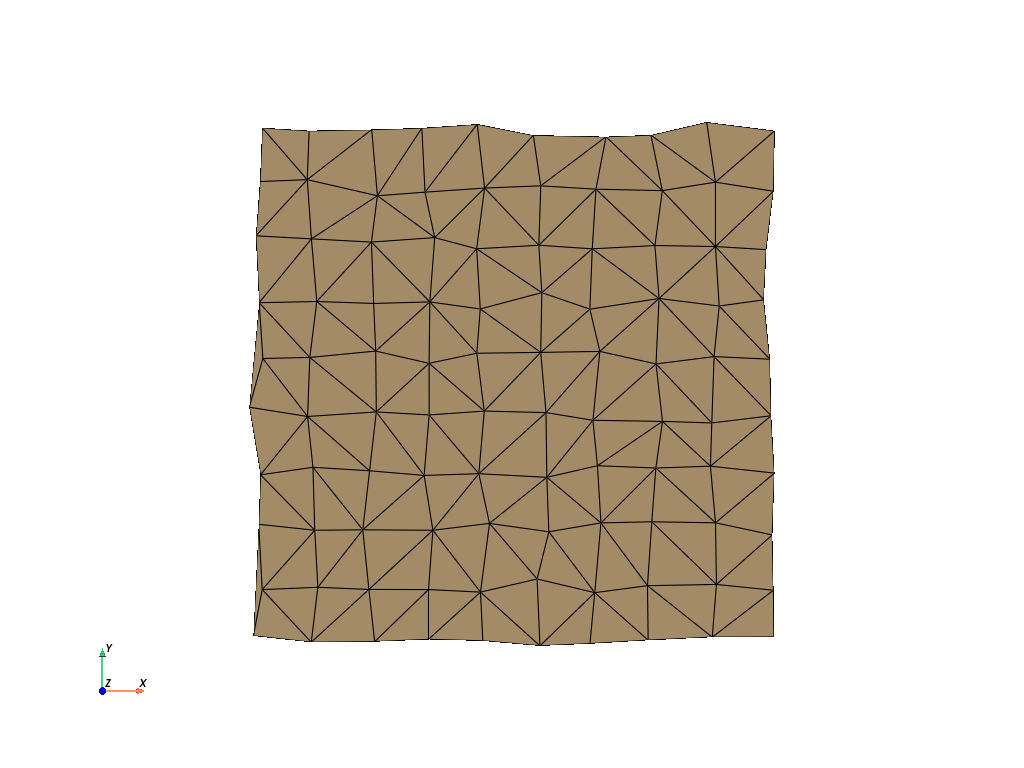

In [7]:
surf = cloud.delaunay_2d()
surf.plot(cpos="xy", show_edges=True)

Note that some of the outer edges are unconstrained and the triangulation
added unwanted triangles. We can mitigate that with the ``alpha`` parameter.



/Users/aidanbx/miniconda/envs/cv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


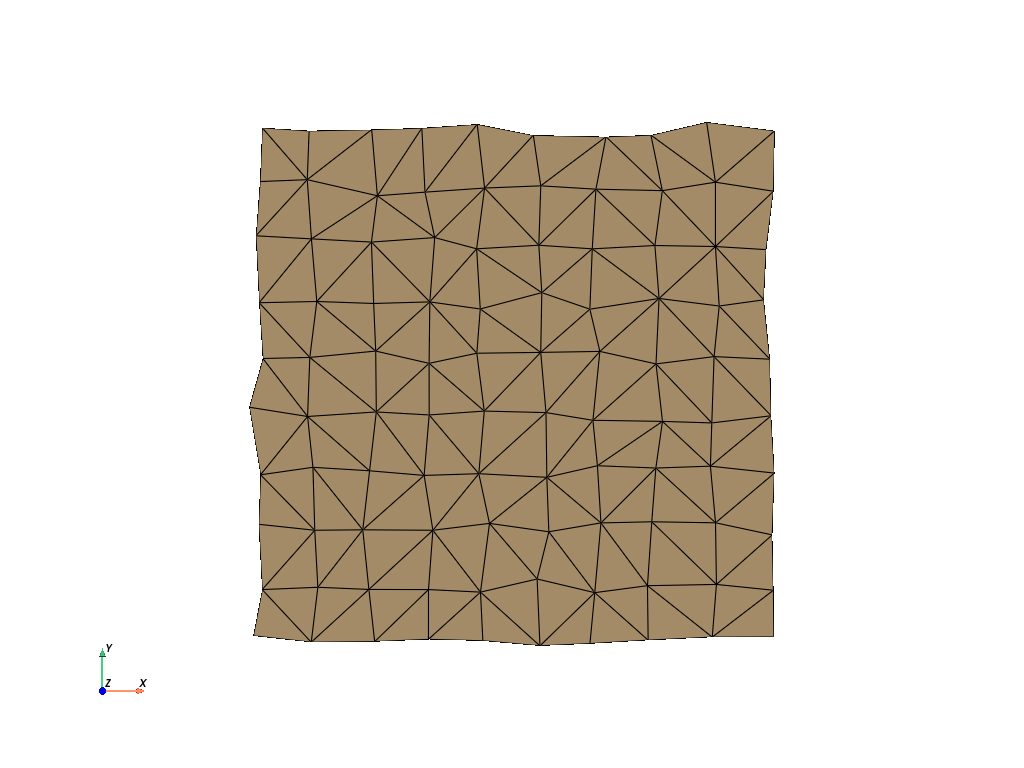

In [8]:
surf = cloud.delaunay_2d(alpha=1.0)
surf.plot(cpos="xy", show_edges=True)

We could also add a polygon to ignore during the triangulation via the
``edge_source`` parameter.



/Users/aidanbx/miniconda/envs/cv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


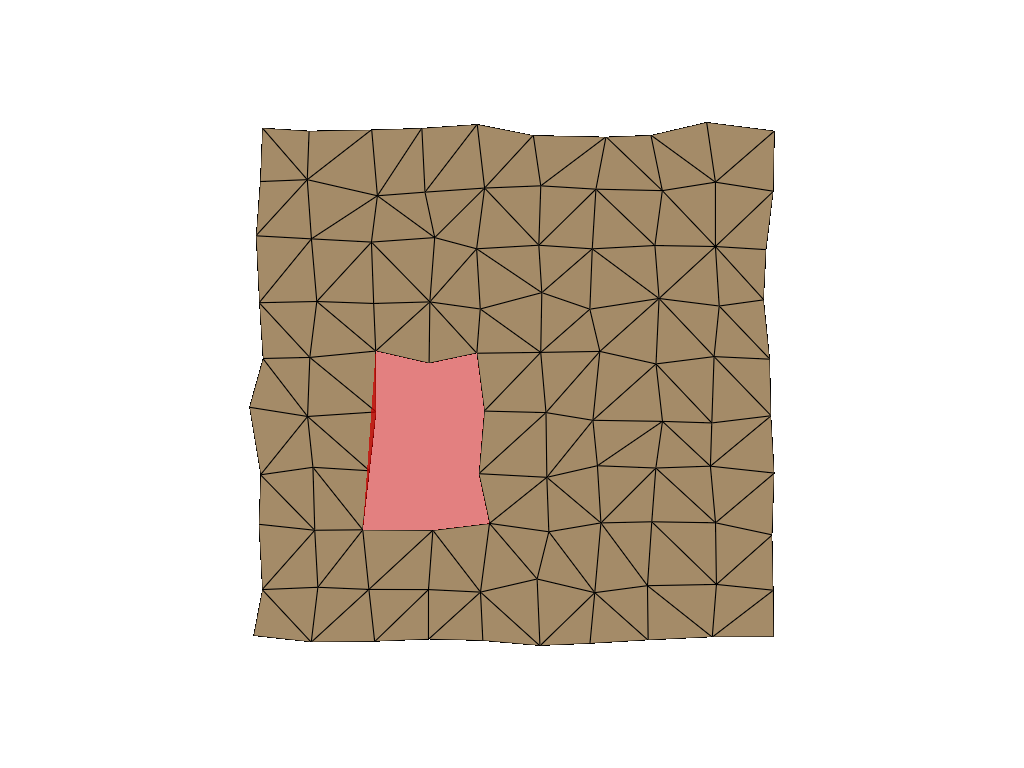

: 

In [9]:
# Define a polygonal hole with a clockwise polygon
ids = [22, 23, 24, 25, 35, 45, 44, 43, 42, 32]

# Create a polydata to store the boundary
polygon = pv.PolyData()
# Make sure it has the same points as the mesh being triangulated
polygon.points = points
# But only has faces in regions to ignore
polygon.faces = np.insert(ids, 0, len(ids))

surf = cloud.delaunay_2d(alpha=1.0, edge_source=polygon)

p = pv.Plotter()
p.add_mesh(surf, show_edges=True)
p.add_mesh(polygon, color="red", opacity=0.5)
p.show(cpos="xy")